### Student Information
Name: Karin Thawornskulchai

Student ID: 109065710

GitHub ID: K4rinT

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip) by right-clicking it and open as a new tab. The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__.

In [157]:
### Begin Assignment Here ###

# 1st-Assignment
First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__

In [158]:
# Initialization

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) # assign categories first

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### Exercise 2 (Take home):
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [159]:
# Answer here
# Using query df.query('condition')
X.query('category == 3')

,text,category,category_name
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
...,...,...,...
2229,From: jcj@tellabs.com (jcj) Subject: Re: proof...,3,soc.religion.christian
2230,From: news@cbnewsk.att.com Subject: Re: Bible ...,3,soc.religion.christian
2246,From: lmvec@westminster.ac.uk (William Hargrea...,3,soc.religion.christian
2247,From: daniels@math.ufl.edu (TV's Big Dealer) S...,3,soc.religion.christian


---

### Exercise 5 (Take home):
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [160]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [161]:
# Check for the missing value
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [162]:
# Answer here

Thing we have to know first.
1. `NaN` stands for "Not a Number" which are numerical values that are missing values in an array.  
(`np.nan` == `NaN`)
2. `.isnull()` will return `True` wherever it find missing field or records.
3. `None` is a preserved word in `numpy` it indicates an object with has no value.


As I have observed there 3 items
1. As in row 1: Eventhough we did not define data in column `missing_example`;
    All the data that we did not define will input as `NaN`
2. The reason why column 2, 3, 5 `.isnull()` function didn't work because type of that data are `str`
    That why `is.null()` function is not work.
    (As in Reference #1)
3. `np.nan` & `None` in row 1 and 4 is null will show as `NaN` because it a missing value.
    (Refer more explanation from "Thing we have to know first")

In [163]:
# Reference #1
print('For id == C; type of data in missing example = ', type(NA_df['missing_example'][2]))
print('For id == D; type of data in missing example = ', type(NA_df['missing_example'][3]))
print('For id == F; type of data in missing example = ', type(NA_df['missing_example'][5]))

For id == C; type of data in missing example =  <class 'str'>
For id == D; type of data in missing example =  <class 'str'>
For id == F; type of data in missing example =  <class 'str'>


---

### Exercise 6 (Take home)
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [164]:
# X Dataframe
X

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


In [165]:
# X_sample Dataframe
X_sample = X.sample(n=1000) #random state
X_sample

,text,category,category_name
2066,From: chert@dungeon.cirr.com (Chert Pellett) S...,1,comp.graphics
2003,Organization: University of Illinois at Chicag...,2,sci.med
744,From: roell@informatik.tu-muenchen.de (Thomas ...,1,comp.graphics
379,From: N020BA@tamvm1.tamu.edu Subject: Re: Help...,1,comp.graphics
331,From: simon@monu6.cc.monash.edu.au Subject: Sa...,3,soc.religion.christian
...,...,...,...
987,From: h8902939@hkuxa.hku.hk (Abel) Subject: De...,1,comp.graphics
1798,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
1305,"From: apd2c@Virginia.EDU (""Andrew Paul Dickens...",1,comp.graphics
1905,From: Bjorn.B.Larsen@delab.sintef.no (Bjorn B....,3,soc.religion.christian


In [166]:
# Answer here

1. X_sample will not be the same in each time that running code. (It's `random`)
2. X_sample's row size != X's row size (1000 v.s. 2257)
  User input n which n = Number of items from axis to return so X_sample have row size = 1000
3. The index of X_sample is not order because it will random 1000 row out row data from X dataframe (2257)

---

### Exercise 8 (Take home)
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

In [167]:
# Answer here #

<AxesSubplot: title={'center': 'Category distribution'}>

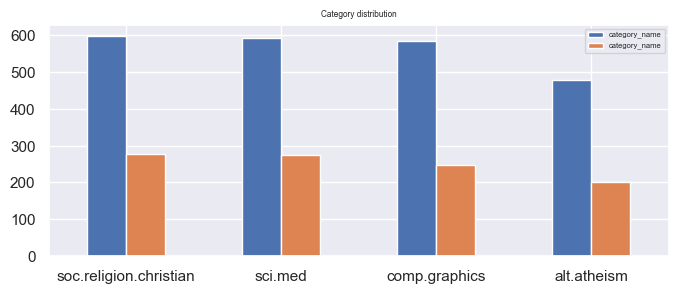

In [168]:
# To do a side-by-side comparison between 2 datasets,
# We have to concatenate 2 data frames into 1 dataframe
# Then use plot functions

df_X = X.category_name.value_counts()
df_X_sample = X_sample.category_name.value_counts()
df_XC = pd.concat([df_X, df_X_sample], axis = 1)      # Concatenate axis = 1 >> Horizontal
df_XC.plot(kind = 'bar', title = 'Category distribution', rot = 0, fontsize = 11, figsize = (8,3))


---

### Exercise 10 (Take home)
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [169]:
# Initialization

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)     #learn the vocabulary and return document-term matrix
print(X_counts[0])


  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


In [170]:
# Answer here
X_array = X_counts[4, 0:100].toarray()
Y = np.where(X_array == 1)              # return element where X_array == 1

for i in range(len(Y)):
    print(count_vect.get_feature_names_out()[Y[i][1]])


00
01


The another 1 value that represent from the vocabulary is `01`

---

### Exercise 11 (Take home)
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

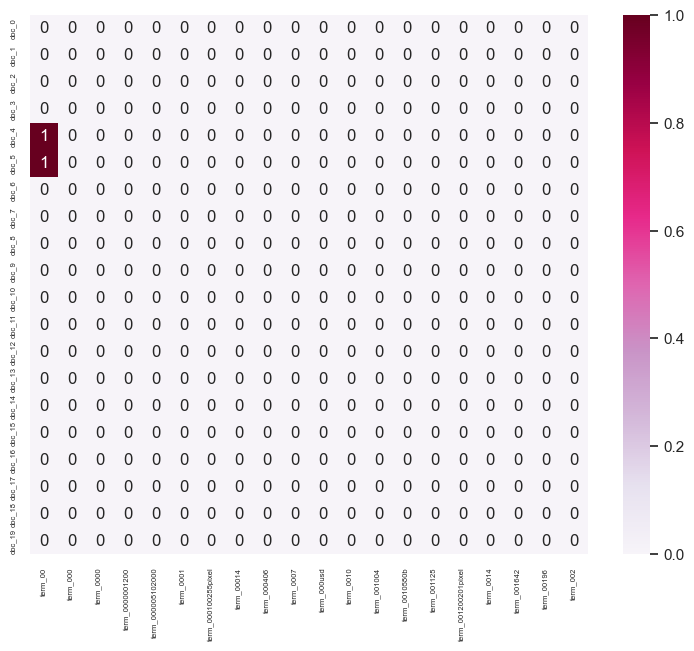

In [171]:
# Previous parts from Lab #
import seaborn as sns

plot_x = ["term_" + str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_" + str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.set(font_scale = 1)
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

__Answer__
To do this efficiently, I will compress the matrix using `from scipy.sparse import csc_matrix`.
After we print out the compress matrix it will show the element that value is not in `zero` term.

I will show the method as below !.


In [172]:
from scipy.sparse import csc_matrix             # import compressed sparse row matrix from scipy.sparse library
sparse_X = csc_matrix(X_counts[0:20, 0:20])     # Compress the X_counts[0:20, 0:20]
print(sparse_X)                                 # The answer after printout will show only the element's value != 0

  (4, 0)	1
  (5, 0)	1


In [173]:
rows, cols = sparse_X.nonzero()         # Get the rows and columns data from sparse_X with non-zero term.

In [174]:
rows

array([4, 5], dtype=int32)

In [175]:
cols

array([0, 0], dtype=int32)

In [176]:
# sparse_X will also keep the zero element but it was compressed by the csc_matrix
sparse_X

<20x20 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Column format>

Instead of keeping data with [zero-term] + [non-zero-term],
We keep in Compressed Sparse when printout show only [non-zero-term] is more efficient.

Below is the plot using spy plot which will plot the sparsity pattern of a 2D array.
It will visualize the non-zero value of the array.
In addition, I also include the annotation in the plot which will show that which word is non-zero term.

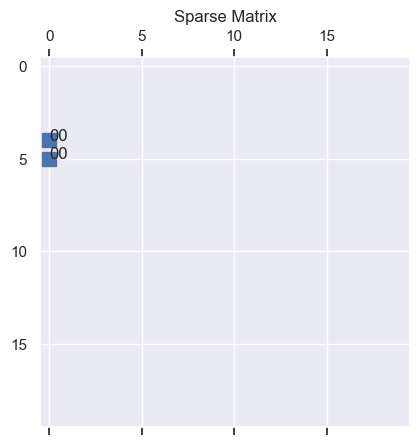

In [177]:
import matplotlib.pyplot as plt
plt.spy(sparse_X)               # Spy-plot will plot the sparsity patter of a 2D array.
plt.title("Sparse Matrix")      # Title as 'Sparse Matrix'

# This will annotate the word in spy-plot #
for i in range(len(rows)):
    plt.text(cols[i], rows[i], count_vect.get_feature_names_out()[cols[i]])

---

### Exercise 12 (Take home)
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [178]:
# Initialization
from sklearn.decomposition import PCA       # Concept PCA reduce dimension from 2257 to 3

In [179]:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

In [180]:
X_reduced.shape

(2257, 3)

In [181]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

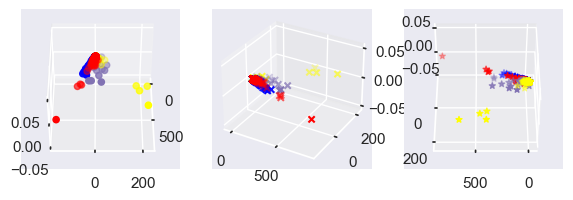

In [182]:
col = ['red', 'blue', 'yellow', 'm']

# plot
fig = plt.figure(figsize = (7,5))
ax = fig.add_subplot(1,3,1, projection = '3d')          # This will create plot in 1st order with 3D plot.
ax1 = fig.add_subplot(1,3,2, projection = '3d')         # This will create plot in 2nd order with 3D plot.
ax2 = fig.add_subplot(1,3,3, projection = '3d')         # This will create plot in 3rd order with 3D plot.

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]

    ax.scatter(xs, ys, c = c, marker='o')
    ax1.scatter(xs, ys, c = c, marker='x')
    ax2.scatter(xs, ys, c = c, marker ='*')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)

ax.view_init(45, 0)                                 # Rotate the view's angle of 1st plot order.
ax2.view_init(45, 90)                               # Rotate the view's angle of 3rd plot order.
                                                    # 2nd plot order I use the default view's angle.
plt.show()

From above 3 graph,
There are 2 group that I think it's an outlier data,
1. Red colour in alt.atheism category_name: 1 data
2. Yellow colour in comp.graphics category_name: 4 data set

---

### Exercise 13 (Take home)
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [183]:
# Stage Preparation

In [184]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [185]:
# Answer here

In [186]:
# Using plotly
import pandas as pd
import plotly.express as px

df_plotly = pd.DataFrame(count_vect.get_feature_names_out()[:300], columns = ['Term'])
df_plotly['Term_Freq'] = term_frequencies[:300]
df_plotly_fig = px.bar(df_plotly, x='Term', y='Term_Freq')
df_plotly_fig.show()

In [187]:
## Karin 20/Oct ##
## Github doesn't show plotly plot ##
## Attached static pic instead ##

<img src="img/plotly_ex13.png" />

In [188]:
# Using Wordcloud
dict_word = {}                  # Create empty dictionary
count_1 = 0
for i in count_vect.get_feature_names_out()[:300]:      # Append data in dictionary which key = term, values = frequency.
    dict_word[i] = term_frequencies.tolist()[count_1]
    count_1 = count_1 + 1

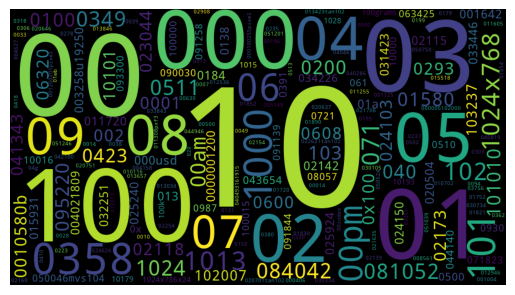

In [189]:
# Using Wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=900,height=500, relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_word)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# The WordCloud will show all term based on the frequency data,
# If frequency is high the word in WordCloud will big.


---

### Exercise 14
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

In [190]:
# Stage Preparation

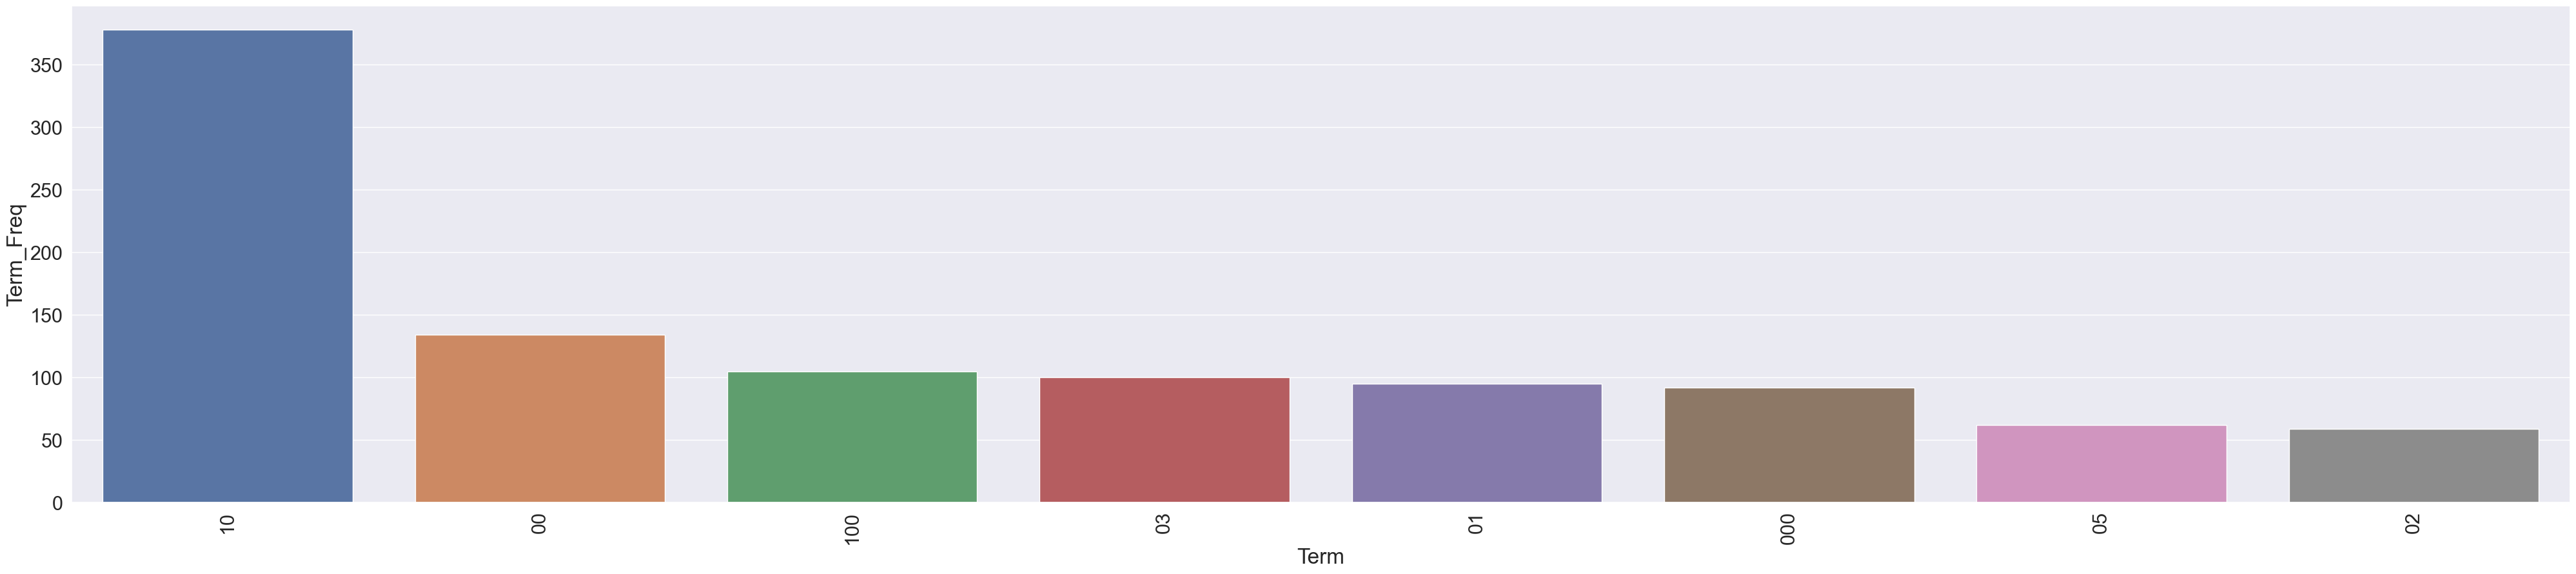

In [191]:
# Efficiency reduce term which frequency <= 50
# Purpose: Visualize the frequency term which show frequency > 50, also sort the value data to easily visualize.
import seaborn as sns
df_filter = df_plotly[df_plotly.Term_Freq > 50].sort_values('Term_Freq', ascending = False)

sns.set(font_scale = 2)

plt.subplots(figsize=(50, 10))
g1 = sns.barplot(x=df_filter.Term, y=df_filter.Term_Freq, order = df_plotly[df_plotly.Term_Freq > 50].sort_values('Term_Freq', ascending = False).Term)
g1.set_xticklabels(df_filter.Term, rotation = 90);


---

### Exercise 15 (Take home)
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [192]:
# Answer here

[Text(0, 0, '10'),
 Text(1, 0, '00'),
 Text(2, 0, '100'),
 Text(3, 0, '03'),
 Text(4, 0, '01'),
 Text(5, 0, '000'),
 Text(6, 0, '05'),
 Text(7, 0, '02'),
 Text(8, 0, '04'),
 Text(9, 0, '08'),
 Text(10, 0, '09'),
 Text(11, 0, '07'),
 Text(12, 0, '0358'),
 Text(13, 0, '1000'),
 Text(14, 0, '101'),
 Text(15, 0, '06'),
 Text(16, 0, '00pm'),
 Text(17, 0, '1013'),
 Text(18, 0, '102'),
 Text(19, 0, '1024x768'),
 Text(20, 0, '071'),
 Text(21, 0, '1024'),
 Text(22, 0, '00am'),
 Text(23, 0, '0349'),
 Text(24, 0, '084042'),
 Text(25, 0, '0511'),
 Text(26, 0, '081052'),
 Text(27, 0, '101010'),
 Text(28, 0, '0200'),
 Text(29, 0, '0100'),
 Text(30, 0, '103'),
 Text(31, 0, '095220'),
 Text(32, 0, '0423'),
 Text(33, 0, '040'),
 Text(34, 0, '01580'),
 Text(35, 0, '02118'),
 Text(36, 0, '0293'),
 Text(37, 0, '0600'),
 Text(38, 0, '02173'),
 Text(39, 0, '041343'),
 Text(40, 0, '023044'),
 Text(41, 0, '024103'),
 Text(42, 0, '0608'),
 Text(43, 0, '06320'),
 Text(44, 0, '0x100'),
 Text(45, 0, '102007'),
 T

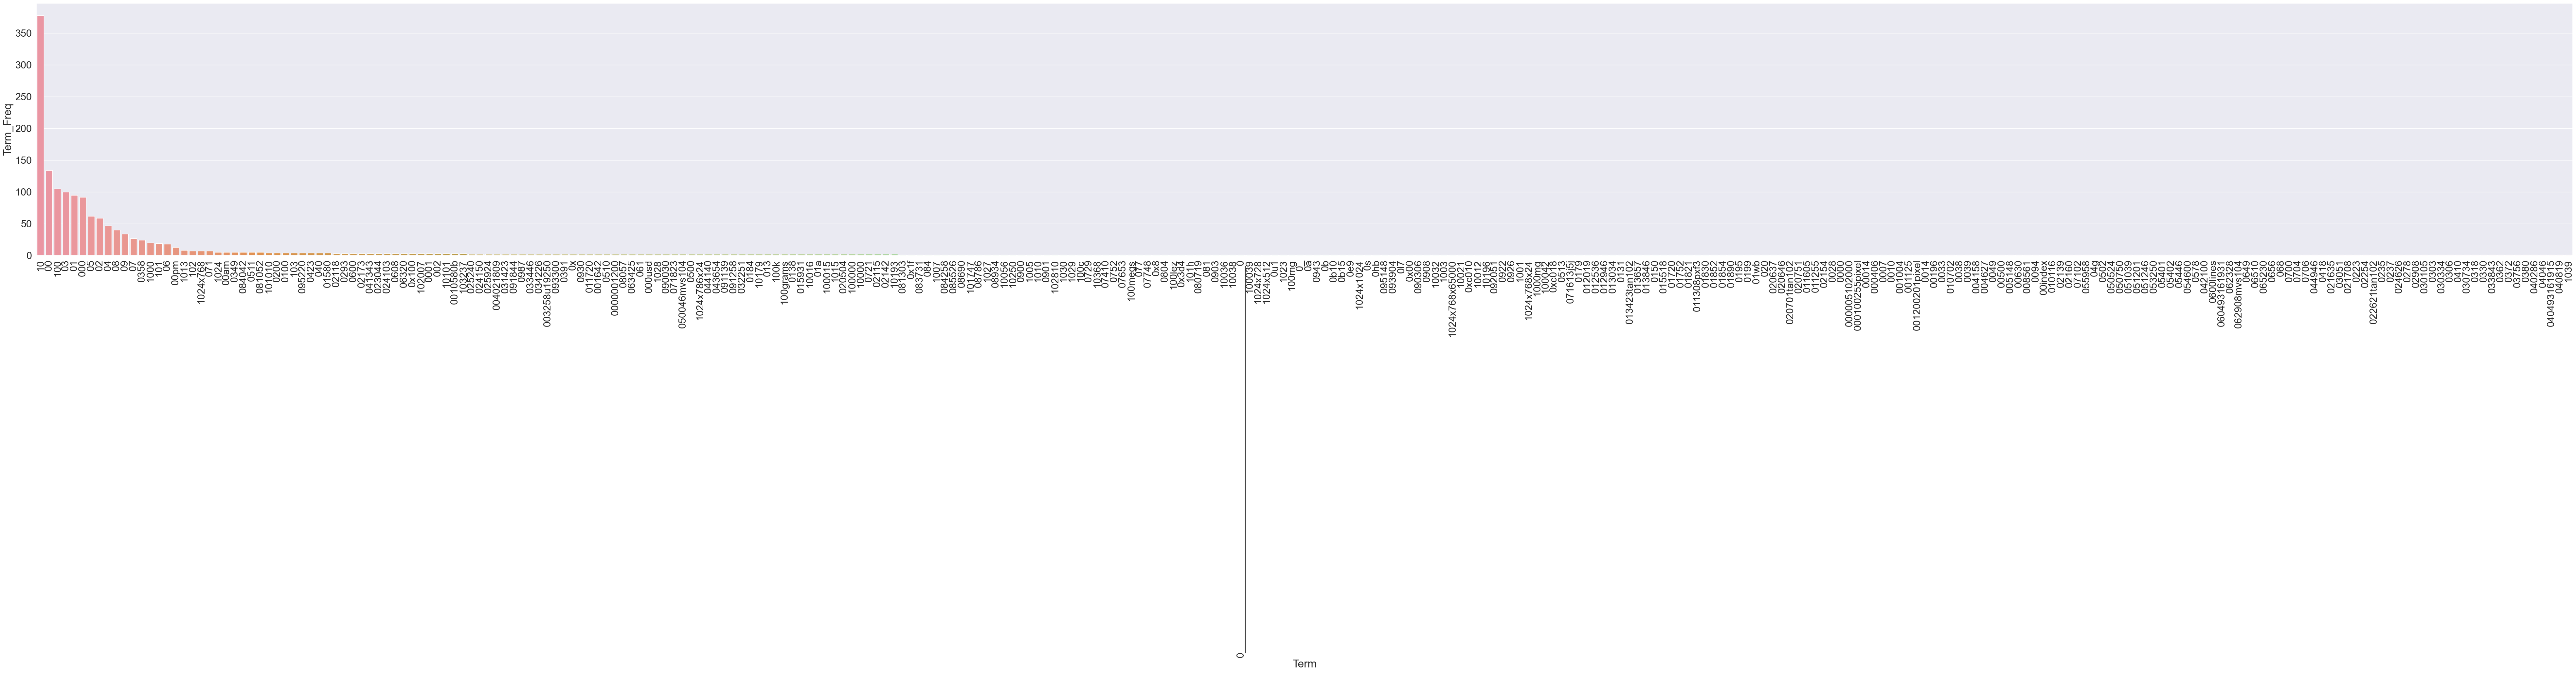

In [193]:
# Sort the X-value and then plot barplot.
# After sort X-value and plot it, the bar plot look like long tail and this time graph will be more meaningful.

df_plotly.sort_values('Term_Freq', ascending = False)
plt.subplots(figsize=(100, 10))

g = sns.barplot(x=df_plotly.Term,
                y=df_plotly.Term_Freq,
                data = df_plotly,
                order = df_plotly.sort_values('Term_Freq', ascending = False).Term)

g.set_xticklabels(g.get_xticklabels(), rotation = 90)


---

### Exercise 16 (Take home)
Try to generate the binarization using the `category_name` column instead. Does it work?

In [194]:
# Preparation #

In [195]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [196]:
mlb = preprocessing.LabelBinarizer()

# 0 [1,0,0,0]
# 1 [0,1,0,0]

In [197]:
mlb.fit(X.category)

LabelBinarizer()

In [198]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [199]:
X[0:]

,text,category,category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
...,...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med,"[0, 0, 1, 0]"
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med,"[0, 0, 1, 0]"
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med,"[0, 0, 1, 0]"
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med,"[0, 0, 1, 0]"


In [200]:
# Binarize using category_name #

In [201]:
mlb.fit(X.category_name)

LabelBinarizer()

In [202]:
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

In [203]:
X[0:9]

,text,category,category_name,bin_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]","[0, 0, 1, 0]"


__Answer:__
It work! Generating the binarization using `category_name`

---

# 2nd-Assignments
Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip) by right-clicking it and open as a new tab. The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

## 2. Data Preparation
In the following we will use 3 of datasets(1. amazon; 2. imdb; 3.yelp) that were downloaded, and using `sklearn.data.load_files` to load the dataset.

In [204]:
# Categories
categories_N = ['amazon', 'imdb', 'yelp']

In [205]:
# Obtain the document using sklearn.datasets.load_files
# Karin notes: Separating categories using sub-folder; sub-folder will be using to separate categories.
import sklearn.datasets
data_dir = sklearn.datasets.load_files('/Users/karin/Desktop/DMLab1/DM2022-Lab1-Homework/dataset', categories=categories_N, shuffle=False, random_state=42)

Let's take a look some of the records that are contained in our subset of the data.

In [206]:
# As I notice the data were encoding in to bytes b''
# We have to decode it!
data_dir.data[0:1]

[b'So there is no way for me to plug it in here in the US unless I go by a converter.\t0\nGood case, Excellent value.\t1\nGreat for the jawbone.\t1\nTied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!\t0\nThe mic is great.\t1\nI have to jiggle the plug to get it to line up right to get decent volume.\t0\nIf you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.\t0\nIf you are Razr owner...you must have this!\t1\nNeedless to say, I wasted my money.\t0\nWhat a waste of money and time!.\t0\nAnd the sound quality is great.\t1\nHe was very impressed when going from the original battery to the extended battery.\t1\nIf the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.\t0\nVery good quality though\t1\nThe design is very odd, as the ear "clip" is not very comfortable at all.\t0\nHighly recommend for any one who has a blue tooth phone.\t1\nI advise EVERY

In [207]:
# Check for the category
data_dir.target_names

['amazon', 'imdb', 'yelp']

In [208]:
# Check length of the data
len(data_dir.data)

3

In [209]:
# Check length of the filenames
len(data_dir.filenames)

3

### We can also print an example from the subset

In [210]:
# An example of what the subset contains
# As previously mentioned that data were encoding in term of byte,
# So we have to decode it.
print('\n'.join(data_dir.data[0].decode().split('\n')))


So there is no way for me to plug it in here in the US unless I go by a converter.	0
Good case, Excellent value.	1
Great for the jawbone.	1
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!	0
The mic is great.	1
I have to jiggle the plug to get it to line up right to get decent volume.	0
If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.	0
If you are Razr owner...you must have this!	1
Needless to say, I wasted my money.	0
What a waste of money and time!.	0
And the sound quality is great.	1
He was very impressed when going from the original battery to the extended battery.	1
If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.	0
Very good quality though	1
The design is very odd, as the ear "clip" is not very comfortable at all.	0
Highly recommend for any one who has a blue tooth phone.	1
I advise EVERYONE DO NOT BE FOOLED!	0
So Far So G

We can determine the label of the example via `target_names` key value

In [211]:
print(data_dir.target_names[data_dir.target[0]])

amazon


In [212]:
data_dir.target[0]

0

We can also get the category of 3 documents via `target` key value

In [213]:
data_dir.target[0:3]

array([0, 1, 2])

Another one way to get access to the text version of the label of a subset of our data_dir:

In [214]:
for t in data_dir.target:
    print(data_dir.target_names[t])

amazon
imdb
yelp


## 3. Data Transformation
So we want to explore and understand our data a little bit better. Before we do that we definitely need to apply some transformations just so we can have our dataset in a nice format to be able to explore it freely and more efficient. Lucky for us, there are powerful scientific tools to transform our data into that tabular format we are so farmiliar with. So that is what we will do in the next section--transform our data into a nice table format.


### 3.1 Converting Dictionary into Pandas Dataframe
Here we will show you how to convert dictionary objects into a pandas dataframe. And by the way, a pandas dataframe is nothing more than a table magically stored for efficient information retrieval.

In [215]:
### Preparation Step: Store data into dictionary ###

In [216]:
# Create empty dictionary for storing sentence data
data_sentiment = {}

# Karin's format for storing data_sentiment
# data_sentiment = {'sentence' : {'categories' : {}, scores : {}}, ... }

# Readme.txt shown format of data as below.
# sentence \t score \n

# Loop for split [sentence] & [score] of website into data_sentiment dict
for j in data_dir.target:
    list_temp_1 = []
    # Data that we have loaded are store encode in byte; we have to decode it from byte to str.
    # Then split each of review; list_temp_1 will have review sentence with score.
    list_temp_1 = data_dir.data[j].decode().split('\n')
    for k in range(len(list_temp_1) - 1):
        list_temp_2 = []
        # This step will split sentence and score.
        # Then append in data_sentiment dictionary.
        list_temp_2 = list_temp_1[k].split("\t")
        data_sentiment[list_temp_2[0]] = {}
        data_sentiment[list_temp_2[0]]['score'] = list_temp_2[1]
        data_sentiment[list_temp_2[0]]['categories'] = data_dir.target_names[j]

In [217]:
# Karin notice! [2022_Oct_10]
# Read me said that data_sentiment should be 3000 data.
# Because dictionary characteristics it will not duplicate data in dictionary.

len(data_sentiment)

2983

In [218]:
### Converting Dictionary into Pandas DataFrame ###

In [219]:
import pandas as pd
Y = pd.DataFrame(data_sentiment.keys(), columns = ['sentence'])     # Construct pandas dataframe from data_sentiment dictionary.
Y

,sentence
0,So there is no way for me to plug it in here i...
1,"Good case, Excellent value."
2,Great for the jawbone.
3,Tied to charger for conversations lasting more...
4,The mic is great.
...,...
2978,I think food should have flavor and texture an...
2979,Appetite instantly gone.
2980,Overall I was not impressed and would not go b...
2981,"The whole experience was underwhelming, and I ..."


In [220]:
Y[0:2]

,sentence
0,So there is no way for me to plug it in here i...
1,"Good case, Excellent value."


In [221]:
for t in Y['sentence'][:3]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


### Adding Columns
One of the great advantages of a pandas dataframe is its flexibility. We can add columns to the current dataset programmatically with very little effort.

In [222]:
# Karin's Function preparation #

In [223]:
def format_scores (target, docs):
    """ Access Scores """
    return docs[target]['score']

def format_category(target, docs):
    """ Access Category """
    return docs[target]['categories']

In [224]:
# Adding 'scores' column to Y-dataframe.
Y['scores'] = Y.sentence.apply(lambda t: format_scores(t, data_sentiment))

In [225]:
# Adding 'categories' column to Y-dataframe.
Y['categories'] = Y.sentence.apply(lambda t: format_category(t, data_sentiment))


Now we can print and see what our table look like

In [226]:
Y[0:10]

,sentence,scores,categories
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
5,I have to jiggle the plug to get it to line up...,0,amazon
6,If you have several dozen or several hundred c...,0,amazon
7,If you are Razr owner...you must have this!,1,amazon
8,"Needless to say, I wasted my money.",0,amazon
9,What a waste of money and time!.,0,amazon


Nice! Isn't it? With this format we can conduct many operations easily and efficiently since Pandas dataframes provide us with a wide range of built-in features/functionalities. These features are operations which can directly and quickly be applied to the dataset. These operations may include standard operations like __removing records with missing values__ and __aggregating new fields__ to the current table (hereinafter referred to as a dataframe), which is desirable in almost every data mining project. Go Pandas!

---

### 3.2 Familiarizing yourself with data
To begin to show you the awesomeness of Pandas dataframes, let us look at how to run a simple query on our dataset. We want to query for the first 10 rows (documents), and we only want to keep the `sentence` and `categories` attributes or fields.

In [227]:
# A simple query #
Y[:10][['sentence', 'categories']]

,sentence,categories
0,So there is no way for me to plug it in here i...,amazon
1,"Good case, Excellent value.",amazon
2,Great for the jawbone.,amazon
3,Tied to charger for conversations lasting more...,amazon
4,The mic is great.,amazon
5,I have to jiggle the plug to get it to line up...,amazon
6,If you have several dozen or several hundred c...,amazon
7,If you are Razr owner...you must have this!,amazon
8,"Needless to say, I wasted my money.",amazon
9,What a waste of money and time!.,amazon


Let us look at a few more interesting queries to familiarize ourselves with the efficiency and conveniency of Pandas dataframes.

#### Let's query the last 10 records

In [228]:
Y[-10:]

,sentence,scores,categories
2973,The refried beans that came with my meal were ...,0,yelp
2974,Spend your money and time some place else.,0,yelp
2975,A lady at the table next to us found a live gr...,0,yelp
2976,the presentation of the food was awful.,0,yelp
2977,I can't tell you how disappointed I was.,0,yelp
2978,I think food should have flavor and texture an...,0,yelp
2979,Appetite instantly gone.,0,yelp
2980,Overall I was not impressed and would not go b...,0,yelp
2981,"The whole experience was underwhelming, and I ...",0,yelp
2982,"Then, as if I hadn't wasted enough of my life ...",0,yelp


Ready for some sourcery? Brace yourselves! Let us see if we can query the first 10th record in our dataframe. For this we will use the build-in function called loc. This allows us to explicity define the columns you want to query.

In [229]:
# using loc (by label)
Y.loc[:10, 'sentence']

0     So there is no way for me to plug it in here i...
1                           Good case, Excellent value.
2                                Great for the jawbone.
3     Tied to charger for conversations lasting more...
4                                     The mic is great.
5     I have to jiggle the plug to get it to line up...
6     If you have several dozen or several hundred c...
7           If you are Razr owner...you must have this!
8                   Needless to say, I wasted my money.
9                      What a waste of money and time!.
10                      And the sound quality is great.
Name: sentence, dtype: object

You can also use the `iloc` function to query a selection of our dataset by position. Take a look at this [great discussion](https://stackoverflow.com/questions/28757389/pandas-loc-vs-iloc-vs-ix-vs-at-vs-iat/43968774) on the differences between the `iloc` and `loc` functions.

In [230]:
# using iloc (by position)
Y.iloc[:10, 0]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: sentence, dtype: object

---

## 4. Data Mining using Pandas
Let's do some serious work now. Let's learn to program some of the ideas and concepts learned so far in the data mining course. This is the only way we can be convince ourselves of the true power of Pandas dataframes.

In [231]:
# Check missing values
Y.isnull()

,sentence,scores,categories
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2978,False,False,False
2979,False,False,False
2980,False,False,False
2981,False,False,False


The `isnull` function looks through the entire dataset for null values and returns `True` wherever it finds any missing field or record. As you will see above, and as we anticipated, our dataset looks clean and all values are present, since `isnull` returns __False__ for all fields and records. But let us start to get our hands dirty and build a nice little function to check each of the records, column by column, and return a nice little message telling us the amount of missing records found. This exercise will also encourage us to explore other capabilities of pandas dataframes. In most cases, the build-in functions are good enough, but as you saw above when the entire table was printed, it is impossible to tell if there are missing records just by looking at preview of records manually, especially in cases where the dataset is huge. We want a more reliable way to achieve this. Let's get to it!

In [232]:
Y.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,scores,categories
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


Okay, a lot happened there in that one line of code, so let's break it down. First, with the `isnull` we tranformed our table into the `True/False` table you see above, where __True__ in this case means that the data is missing and __False__ means that the data is present. We then take the transformed table and apply a function to each row that essentially counts to see if there are missing values in each record and print out how much missing values we found. In other words the `check_missing_values` function looks through each field (attribute or column) in the dataset and counts how many missing values were found.

There are many other clever ways to check for missing data, and that is what makes Pandas so beautiful to work with. You get the control you need as a data scientist or just a person working in data mining projects. Indeed, Pandas makes your life easy!

We have our function to check for missing records, now let us do something mischievous and insert some dummy data into the dataframe and test the reliability of our function. This dummy data is intended to corrupt the dataset. I mean this happens a lot today, especially when hackers want to hijack or corrupt a database.

We will insert a `Series`, which is basically a "one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). The axis labels are collectively called index.", into our current dataframe.

In [233]:
# Create dummy_series which the value is missing.
dummy_series = pd.Series(['dummy_record', 'yelp'], index = ['sentence', 'categories'])
dummy_series

sentence      dummy_record
categories            yelp
dtype: object

In [234]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose

,sentence,categories
0,dummy_record,yelp


In [235]:
result_with_series = pd.concat([Y, dummy_series.to_frame().T], ignore_index=True)

In [236]:
# check if the records was committed into result
len(result_with_series)

2984

Now we that we have added the record with some missing values. Let try our function and see if it can detect that there is a missing value on the resulting dataframe.

In [237]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,scores,categories
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,1,0


Indeed there is a missing value in this new dataframe. Specifically, the missing value comes from the `scores` attribute. As I mentioned before, there are many ways to conduct specific operations on the dataframes. In this case let us use a simple dictionary and try to insert it into our original dataframe `Y`. Notice that above we are not changing the `Y` dataframe as results are directly applied to the assignment variable provided. But in the event that we just want to keep things simple, we can just directly apply the changes to `Y` and assign it to itself as we will do below. This modification will create a need to remove this dummy record later on, which means that we need to learn more about Pandas dataframes. This is getting intense! But just relax, everything will be fine!

In [238]:
# dummy record as dictionary format
dummy_dict = [{'sentence': 'dummy_record',
               'categories': 'yelp'
               }]

In [239]:
Y = pd.concat([Y, pd.DataFrame(dummy_dict)], ignore_index = True)

In [240]:
len(Y)

2984

In [241]:
Y.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,scores,categories
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,1,0


So now that we can see that our data has missing values, we want to remove the records with missing values. The code to drop the record with missing that we just added, is the following:

In [242]:
Y.dropna(inplace = True)

... and now let us test to see if we gotten rid of the records with missing values.

In [243]:
Y.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,scores,categories
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


And we are back with our original dataset, clean and tidy as we want it. That's enough on how to deal with missing values, let us now move unto something more fun.

---

### 4.2 Dealing with Duplicate Data
Dealing with duplicate data is just as painful as dealing with missing data. The worst case is that you have duplicate data that has missing values. But let us not get carried away. Let us stick with the basics. As we have learned in our Data Mining course, duplicate data can occur because of many reasons. The majority of the times it has to do with how we store data or how we collect and merge data. For instance, we may have collected and stored a tweet, and a retweet of that same tweet as two different records; this results in a case of data duplication; the only difference being that one is the original tweet and the other the retweeted one. Here you will learn that dealing with duplicate data is not as challenging as missing values. But this also all depends on what you consider as duplicate data, i.e., this all depends on your criteria for what is considered as a duplicate record and also what type of data you are dealing with. For textual data, it may not be so trivial as it is for numerical values or images. Anyhow, let us look at some code on how to deal with duplicate records in our `Y` dataframe.

First, let us check how many duplicates we have in our current dataset. Here is the line of code that checks for duplicates; it is very similar to the `isnull` function that we used to check for missing values.

In [244]:
# Check duplicate data
Y.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2978    False
2979    False
2980    False
2981    False
2982    False
Length: 2983, dtype: bool

We can also check the sum of duplicate records by simply doing:

In [245]:
sum(Y.duplicated())

0

Based on that output, you may be asking why did the `duplicated` operation only returned one single column that indicates whether there is a duplicate record or not. So yes, all the `duplicated()` operation does is to check per records instead of per column. That is why the operation only returns one value instead of three values for each column. It appears that we don't have any duplicates since none of our records resulted in `True`. If we want to check for duplicates as we did above for some particular column, instead of all columns, we do something as shown below. As you may have noticed, in the case where we select some columns instead of checking by all columns, we are kind of lowering the criteria of what is considered as a duplicate record. So let us only check for duplicates by only checking the `sentence` attribute.

In [246]:
sum(Y.duplicated('sentence'))

0

Now let us create some duplicated dummy records and append it to the main dataframe `Y`. Subsequenlty, let us try to get rid of the duplicates.

In [247]:
dummy_duplicate_dict = [{
    'sentence': 'dummy record',
    'categories': 'amazon',
    'scores': 5
},
    {
        'sentence': 'dummy record',
        'categories': 'amazon',
        'scores': 5
    }]

In [248]:
Y = pd.concat([Y, pd.DataFrame(dummy_duplicate_dict)], ignore_index = True)

In [249]:
len(Y)

2985

In [250]:
sum(Y.duplicated('sentence'))

1

We have added the dummy duplicates to `Y`. Now we are faced with the decision as to what to do with the duplicated records after we have found it. In our case, we want to get rid of all the duplicated records without preserving a copy. We can simply do that with the following line of code:

In [251]:
Y.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [252]:
len(Y)

2983

---

## 5. Data Preprocessing

In the Data Mining course we learned about the many ways of performing data preprocessing. In reality, the list is quiet general as the specifics of what data preprocessing involves is too much to cover in one course. This is especially true when you are dealing with unstructured data, as we are dealing with in this particular notebook. But let us look at some examples for each data preprocessing technique that we learned in the class. We will cover each item one by one, and provide example code for each category. You will learn how to perform each of the operations, using Pandas, that cover the essentials to Preprocessing in Data Mining. We are not going to follow any strict order, but the items we will cover in the preprocessing section of this notebook are as follows:

- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

### 5.1 Sampling

The first concept that we are going to cover from the above list is sampling. Sampling refers to the technique used for selecting data. The functionalities that we use to selected data through queries provided by Pandas are actually basic methods for sampling. The reasons for sampling are sometimes due to the size of data -- we want a smaller subset of the data that is still representative enough as compared to the original dataset.

We don't have a problem of size in our current dataset since it is just a couple thousand records long. But if we pay attention to how much content is included in the `sentence` field of each of those records, you will realize that sampling may not be a bad idea after all. In fact, we have already done some sampling by just reducing the records we are using here in this notebook; remember that we are only using four categories from the all the 20 categories available. Let us get an idea on how to sample using pandas operations.

In [253]:
Y_sample = Y.sample(n = 1000)

In [254]:
len(Y_sample)

1000

In [255]:
Y_sample[0:5]

,sentence,scores,categories
1127,"IMDB ratings only go as low 1 for awful, it's ...",0,imdb
1723,Nothing new there.,0,imdb
2524,"Great steak, great sides, great wine, amazing ...",1,yelp
2624,"I was proven dead wrong by this sushi bar, not...",1,yelp
2953,I immediately said I wanted to talk to the man...,0,yelp


Let's do something cool here while we are working with sampling! Let us look at the distribution of categories in both the sample and original dataset. Let us visualize and analyze the disparity between the two datasets. To generate some visualizations, we are going to use `matplotlib` python library. With `matplotlib`, things are faster and compatability-wise it may just be the best visualization library for visualizing content extracted from dataframes and when using Jupyter notebooks. Let's take a loot at the magic of `matplotlib` below.

In [256]:
import matplotlib.pyplot as plt
%matplotlib inline

In [257]:
categories_N

['amazon', 'imdb', 'yelp']

imdb      997
yelp      996
amazon    990
Name: categories, dtype: int64


<AxesSubplot: title={'center': 'Category distribution'}>

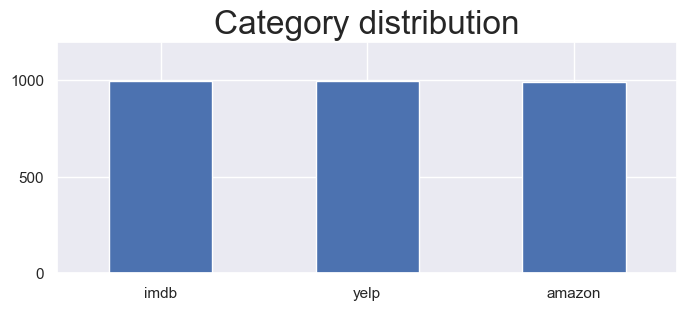

In [258]:
# Bar plot using all data in Y dataframe #
print(Y.categories.value_counts())

# plot barchart for X
Y.categories.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 1200],
                                    rot = 0, fontsize = 11, figsize = (8,3))

imdb      346
yelp      327
amazon    327
Name: categories, dtype: int64


<AxesSubplot: title={'center': 'Category distribution'}>

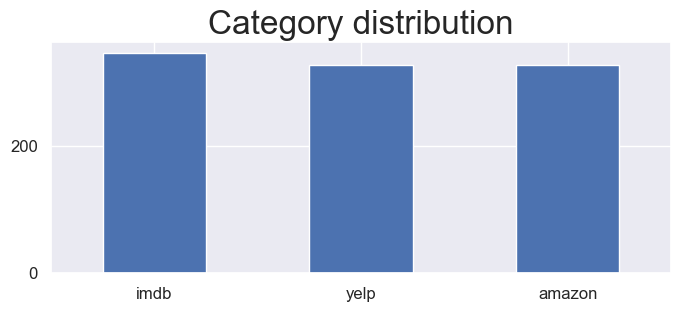

In [259]:
# Bar plot using data in Y_sample dataframe #
print(Y_sample.categories.value_counts())

# plot barchart for X_sample
Y_sample.categories.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           rot = 0, fontsize = 12, figsize = (8,3))

One thing that stood out from the both datasets, is that the distribution of the categories remain relatively the same, which is a good sign for us data scientist. There are many ways to conduct sampling on the dataset and still obtain a representative enough dataset. That is not the main focus in this notebook, but if you would like to know more about sampling and how the `sample` feature works, just reference the Pandas documentation and you will find interesting ways to conduct more advanced sampling.

### 5.2 Feature Creation

The other operation from the list above that we are going to practise on is the so-called feature creation. As the name suggests, in feature creation we are looking at creating new interesting and useful features from the original dataset; a feature which captures the most important information from the raw information we already have access to. In our `Y` table, we would like to create some features from the `sentence` field, but we are still not sure what kind of features we want to create. We can think of an interesting problem we want to solve, or something we want to analyze from the data, or some questions we want to answer. This is one process to come up with features -- this process is usually called `feature engineering` in the data science community.

We know what feature creation is so let us get real involved with our dataset and make it more interesting by adding some special features or attributes if you will. First, we are going to obtain the __unigrams__ for each text. (Unigram is just a fancy word we use in Text Mining which stands for 'tokens' or 'individual words'.) Yes, we want to extract all the words found in each text and append it as a new feature to the pandas dataframe. The reason for extracting unigrams is not so clear yet, but we can start to think of obtaining some statistics about the articles we have: something like __word distribution__ or __word frequency__.

Before going into any further coding, we will also introduce a useful text mining library called NLTK. The NLTK library is a natural language processing tool used for text mining tasks, so might as well we start to familiarize ourselves with it from now (It may come in handy for the final project!). In partcular, we are going to use the NLTK library to conduct tokenization because we are interested in splitting a sentence into its individual components, which we refer to as words, emojis, emails, etc. So let us go for it! We can call the `nltk` library as follows:

In [260]:
import nltk

In [261]:
# takes a like a minute or two to process
Y['unigrams'] = Y['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [262]:
Y[0:4]['unigrams']

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

If you take a closer look at the `Y` table now, you will see the new columns `unigrams` that we have added. You will notice that it contains an array of tokens, which were extracted from the original `sentence` field. At first glance, you will notice that the tokenizer is not doing a great job, let us take a closer at a single record and see what was the exact result of the tokenization using the `nltk` library.

In [263]:
Y[0:4]

,sentence,scores,categories,unigrams
0,So there is no way for me to plug it in here i...,0,amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin..."


In [264]:
list(Y[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

The `nltk` library does a pretty decent job of tokenizing our text. There are many other tokenizers online, such as spaCy, and the built in libraries provided by scikit-learn. We are making use of the NLTK library because it is open source and because it does a good job of segmentating text-based data.

### 5.3 Feature subset selection

Okay, so we are making some headway here. Let us now make things a bit more interesting. We are going to do something different from what we have been doing thus far. We are going use a bit of everything that we have learned so far. Briefly speaking, we are going to move away from our main dataset (one form of feature subset selection), and we are going to generate a document-term matrix from the original dataset. In other words we are going to be creating something like this.

In [265]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect_1 = CountVectorizer()
Y_counts = count_vect_1.fit_transform(Y.sentence) #learn the vocabulary and return document-term matrix
print(Y_counts[0])

  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


What we did with those two lines of code is that we transformed the articles into a __term-document matrix__. Those lines of code tokenize each article using a built-in, default tokenizer (often referred to as an `analzyer`) and then produces the word frequency vector for each document. We can create our own analyzers or even use the nltk analyzer that we previously built. To keep things tidy and minimal we are going to use the default analyzer provided by `CountVectorizer`. Let us look closely at this analyzer.

In [266]:
# Another Tokenize method
analyze = count_vect_1.build_analyzer()

# tokenization, remove stop words, create n-gram (or unigram)

In [267]:
analyze(Y.sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [268]:
analyze(" ".join(list(Y[:1].sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

Now let us look at the term-document matrix we built above.

In [269]:
# We can check the shape of this matrix by:
Y_counts.shape

(2983, 5155)

In [270]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect_1.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

Above we can see the features found in the all the documents `Y`, which are basically all the terms found in all the documents. As I said earlier, the transformation is not in the pretty format (table) we saw above -- the term-document matrix. We can do many things with the `count_vect` vectorizer and its transformation `Y_counts`. You can find more information on other cool stuff you can do with the CountVectorizer.

Now let us try to obtain something that is as close to the pretty table I provided above. Before jumping into the code for doing just that, it is important to mention that the reason for choosing the `fit_transform` for the `CountVectorizer` is that it efficiently learns the vocabulary dictionary and returns a term-document matrix.

In the next bit of code, we want to extract the first five articles and transform them into document-term matrix, or in this case a 2-dimensional array. Here it goes.

In [271]:
# we convert from sparse array to normal array
Y_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [272]:
count_vect_1.get_feature_names_out()[45:46]

array(['45'], dtype=object)

As you can see the result is just this huge sparse matrix, which is computationally intensive to generate and difficult to visualize. But we can see that the 45th record, specifically, contains a `1`, which from our feature names we can deduce that this article contains exactly one `45` term.

To get you started in thinking about how to better analyze your data or transformation, let us look at this nice little heat map of our term-document matrix. It may come as a surpise to see the gems you can mine when you start to look at the data from a different perspective. Visualization are good for this reason.

In [273]:
# first fifty features only
plot_X = ["term_"+str(i) for i in count_vect_1.get_feature_names_out()[0:50]]

In [274]:
# obtain document index
plot_Y = ["doc_"+ str(i) for i in list(Y.index)[0:50]]

In [275]:
plot_Z = Y_counts[0:50, 0:50].toarray()     #Y_counts[how many documents, how many terms]
plot_Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

For the heat map, we are going to use another visualization library called `seaborn`. It's built on top of matplotlib and closely integrated with pandas data structures.

The other big advantage of seaborn is that seaborn has some built-in plots that matplotlib does not support. Most of these can eventually be replicated by hacking away at matplotlib, but they’re not built in and require much more effort to build.

So without further ado, let us try it now!

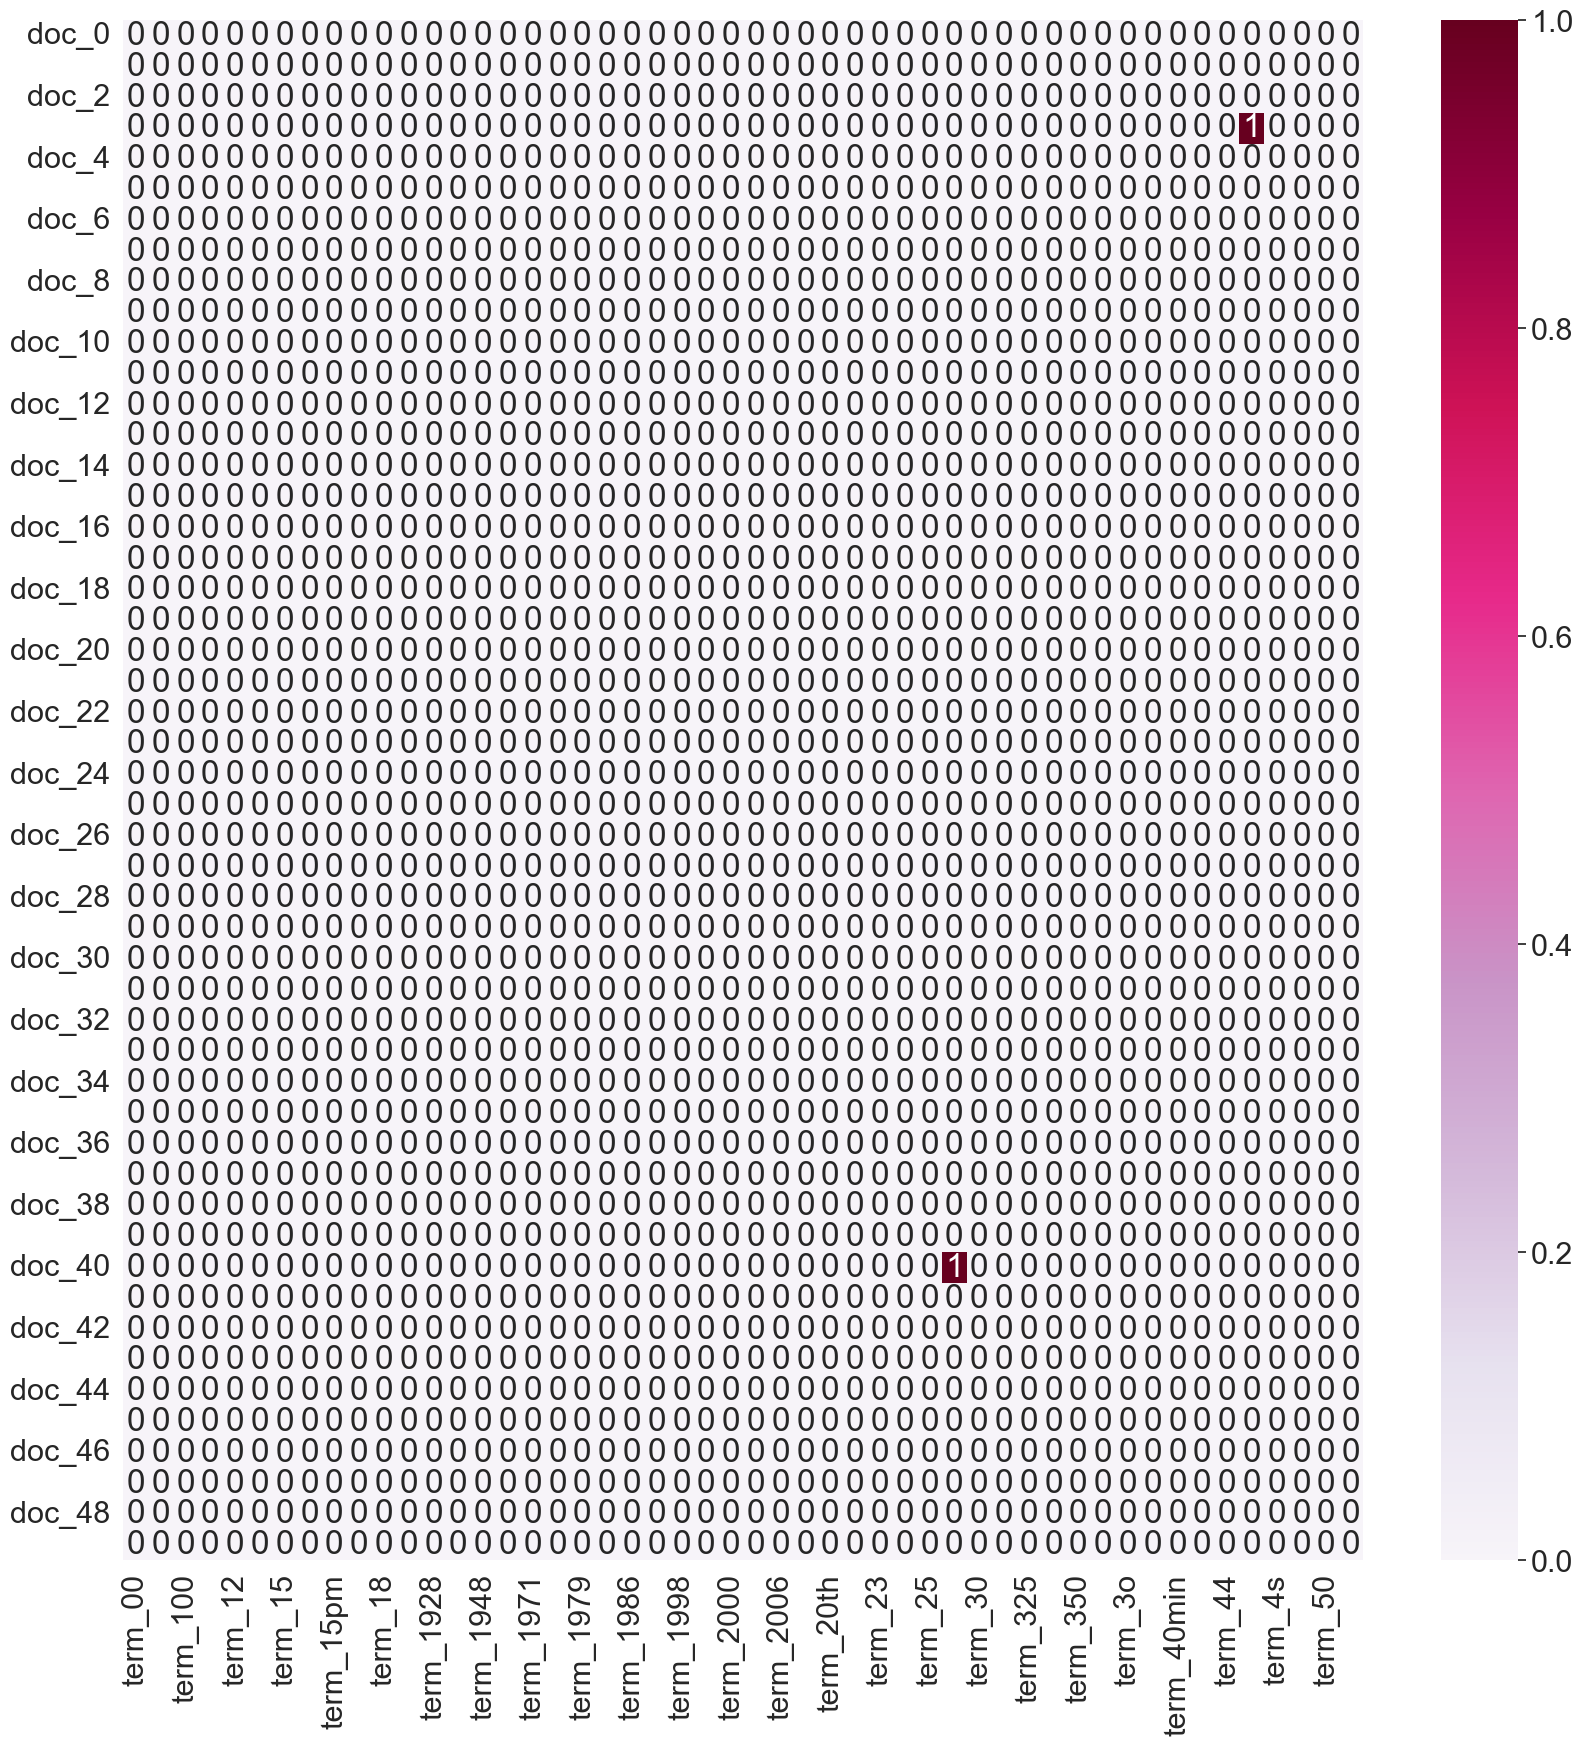

In [276]:
import seaborn as sns

df_todraw_1 = pd.DataFrame(plot_Z, columns = plot_X, index = plot_Y)
plt.subplots(figsize=(20, 20))
ax = sns.heatmap(df_todraw_1,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)
ax = sns.set(font_scale = 0.5)

The great thing about what we have done so far is that we now open doors to new problems. Let us be optimistic. Even though we have the problem of sparsity and a very high dimensional data, we are now closer to uncovering wonders from the data. You see, the price you pay for the hard work is worth it because now you are gaining a lot of knowledge from what was just a list of what appeared to be irrelevant articles. Just the fact that you can blow up the data and find out interesting characteristics about the dataset in just a couple lines of code, is something that truly inspires me to practise Data Science. That's the motivation right there!

### 5.4 Dimensionality Reduction

Since we have just touched on the concept of sparsity most naturally the problem of "curse of dimentionality" comes up. I am not going to get into the full details of what dimensionality reduction is and what it is good for just the fact that is an excellent technique for visualizing data efficiently (please refer to notes for more information). All I can say is that we are going to deal with the issue of sparsity with a few lines of code. And we are going to try to visualize our data more efficiently with the results.

We are going to make use of Principal Component Analysis to efficiently reduce the dimensions of our data, with the main goal of "finding a projection that captures the largest amount of variation in the data." This concept is important as it is very useful for visualizing and observing the characteristics of our dataset.

PCA Algorithm

__Input__: Raw term-vector matrix

__Output__: Projections

In [277]:
from sklearn.decomposition import PCA

In [278]:
Y_reduced = PCA(n_components=2).fit_transform(Y_counts.toarray())

In [279]:
Y_reduced.shape

(2983, 2)

In [280]:
categories_N

['amazon', 'imdb', 'yelp']

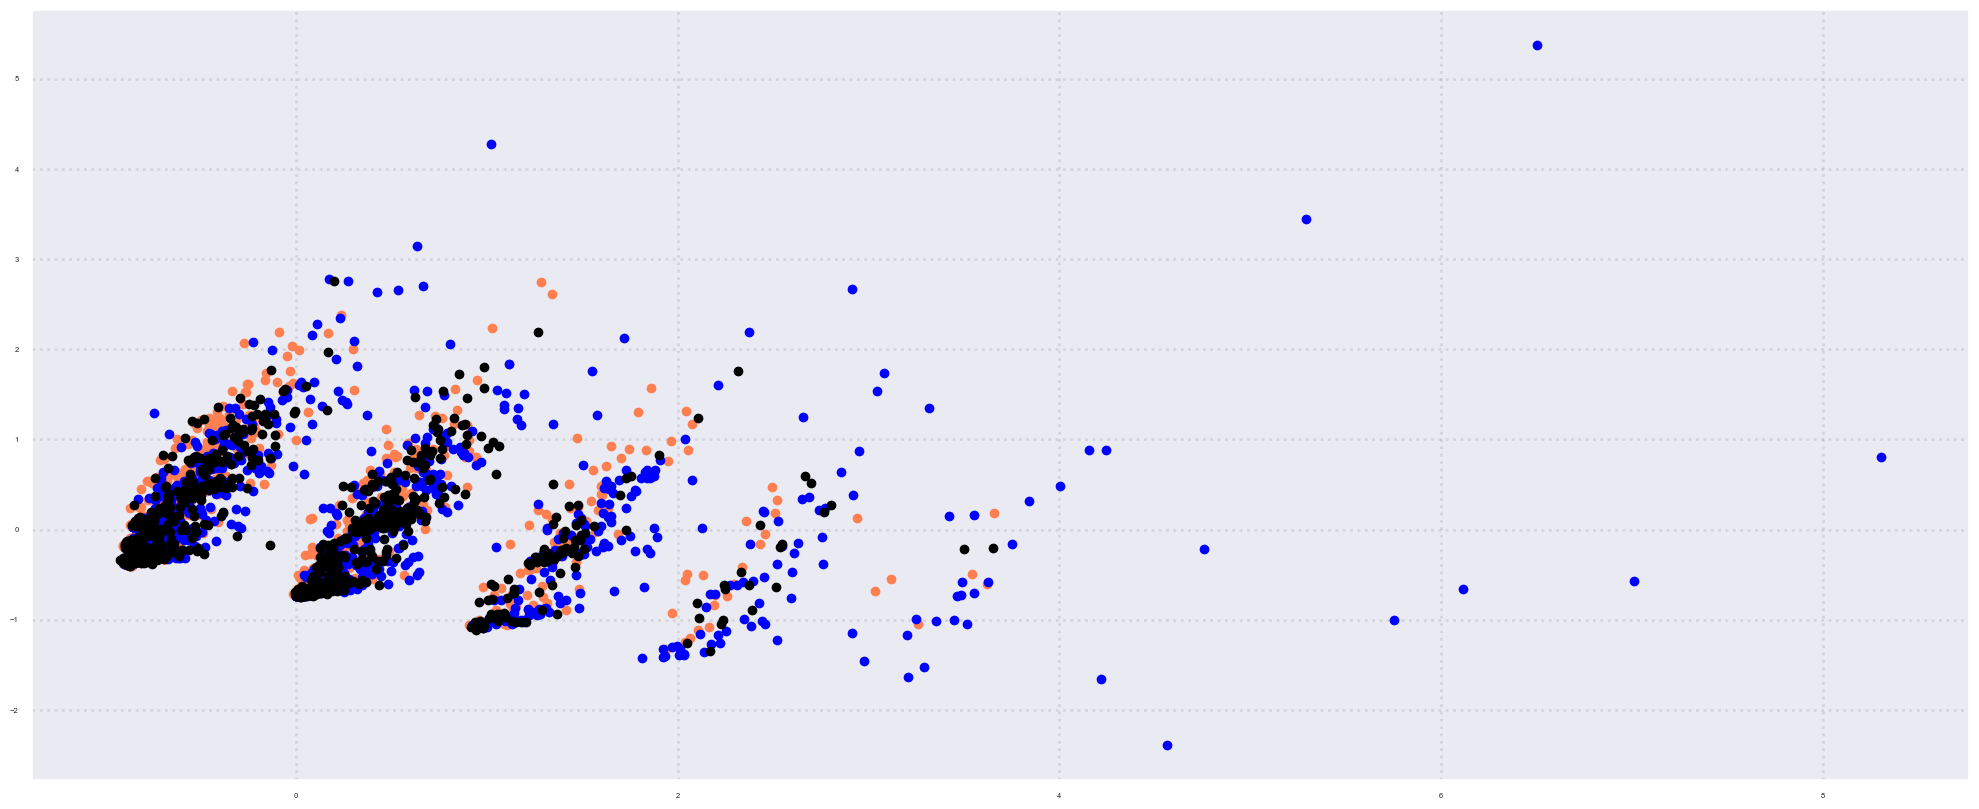

In [281]:
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories_N):
    xs = Y_reduced[Y['categories'] == category].T[0]
    ys = Y_reduced[Y['categories'] == category].T[1]

    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)

plt.show()

From the 2D visualization above, we can see a slight "hint of separation in the data"; i.e., they might have some special grouping by category, but it is not immediately clear. The PCA was applied to the raw frequencies and this is considered a very naive approach as some words are not really unique to a document. Only categorizing by word frequency is considered a "bag of words" approach. Later on in the course you will learn about different approaches on how to create better features from the term-vector matrix, such as term-frequency inverse document frequency so-called TF-IDF.

### 5.5 Attribute Transformation / Aggregation

We can do other things with the term-vector matrix besides applying dimensionality reduction technique to deal with sparsity problem. Here we are going to generate a simple distribution of the words found in all the entire set of articles. Intuitively, this may not make any sense, but in data science sometimes we take some things for granted, and we just have to explore the data first before making any premature conclusions. On the topic of attribute transformation, we will take the word distribution and put the distribution in a scale that makes it easy to analyze patterns in the distrubution of words. Let us get into it!

First, we need to compute these frequencies for each term in all documents. Visually speaking, we are seeking to add values of the 2D matrix, vertically; i.e., sum of each column. You can also refer to this process as aggregation, which we won't explore further in this notebook because of the type of data we are dealing with. But I believe you get the idea of what that includes.

In [282]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies_1 = []
for j in range(0,Y_counts.shape[1]):
    term_frequencies_1.append(sum(Y_counts[:,j].toarray()))

In [283]:
term_frequencies_1 = np.asarray(Y_counts.sum(axis=0))[0]

In [284]:
term_frequencies_1[0] #sum of first term

1

In [285]:
term_frequencies_1

array([ 1, 36,  3, ...,  1,  2,  1])

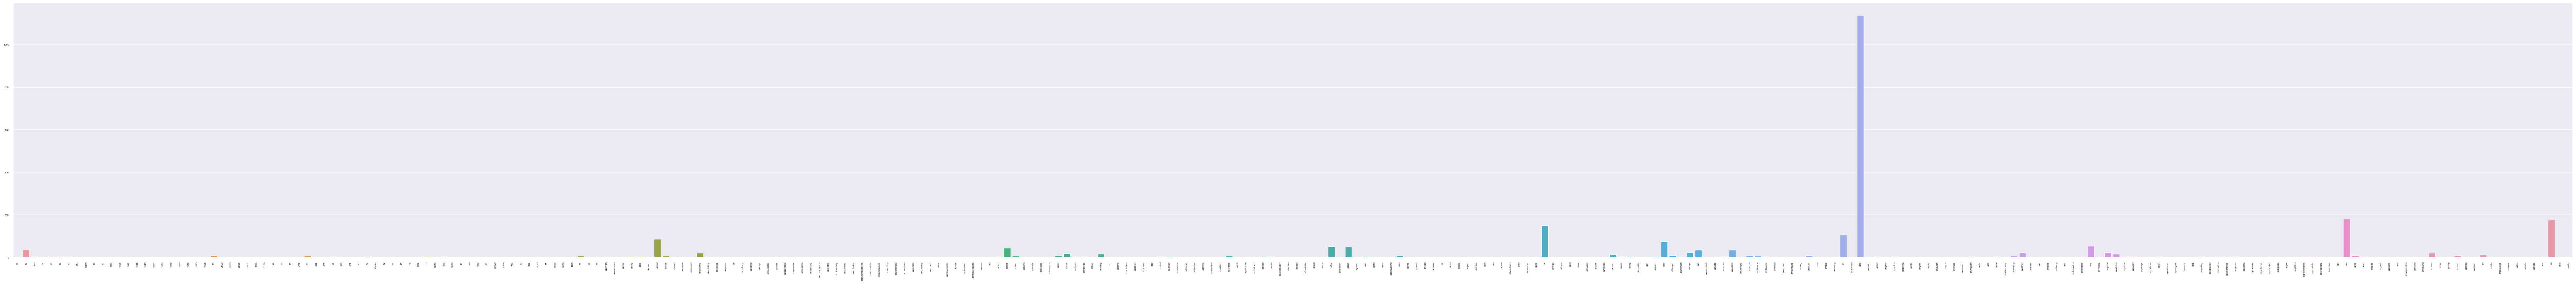

In [286]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect_1.get_feature_names_out()[:300],
                y=term_frequencies_1[:300])
g.set_xticklabels(count_vect_1.get_feature_names_out()[:300], rotation = 90);

Since we already have those term frequencies, we can also transform the values in that vector into the log distribution. All we need is to import the `math` library provided by python and apply it to the array of values of the term frequency vector. This is a typical example of attribute transformation. Let's go for it. The log distribution is a technique to visualize the term frequency into a scale that makes you easily visualize the distribution in a more readable format. In other words, the variations between the term frequencies are now easy to observe. Let us try it out!

In [287]:
import math
term_frequencies_log_1 = [math.log(i) for i in term_frequencies_1]

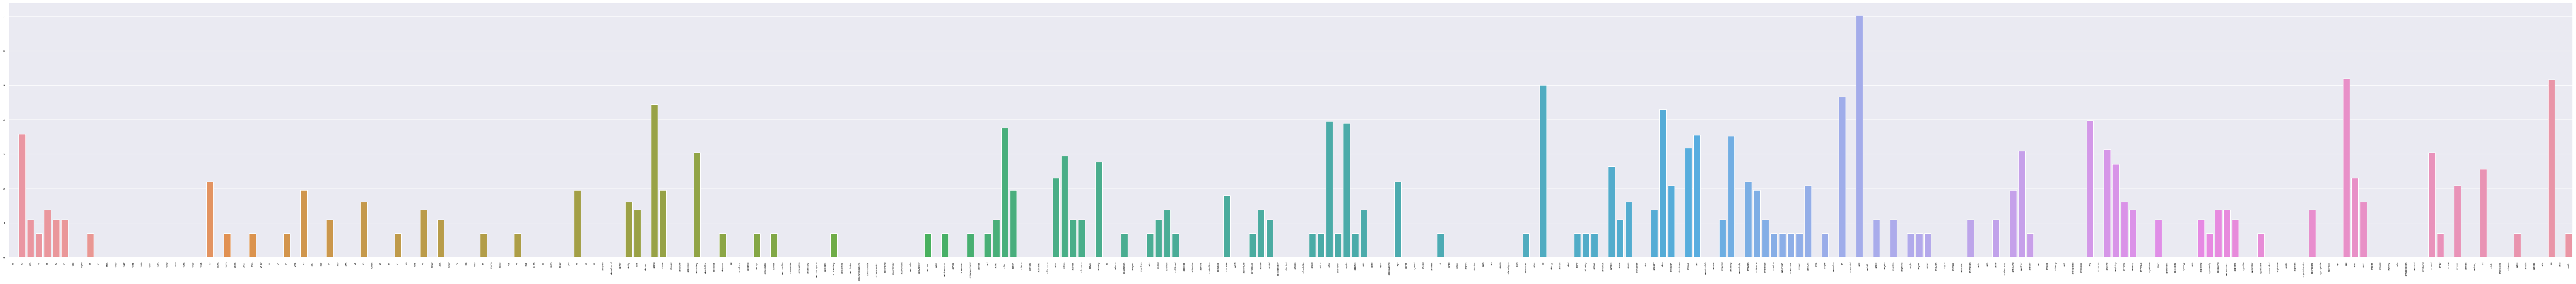

In [288]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect_1.get_feature_names_out()[:300],
                y=term_frequencies_log_1[:300])
g.set_xticklabels(count_vect_1.get_feature_names_out()[:300], rotation = 90);

Besides observing a complete transformation on the distribution, notice the scale on the y-axis. The log distribution in our unsorted example has no meaning, but try to properly sort the terms by their frequency, and you will see an interesting effect. Go for it!

### 5.6 Discretization and Binarization

In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `categories`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different preference on how we refer to the concepts. Let us take a look at what we want to achieve in code.

In [289]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [290]:
mlb = preprocessing.LabelBinarizer()

In [291]:
mlb.fit(Y.categories)

LabelBinarizer()

In [292]:
Y['bin_category'] = mlb.transform(Y['categories']).tolist()

In [293]:
Y[0:9]

,sentence,scores,categories,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,amazon,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"
1,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
4,The mic is great.,1,amazon,"[The, mic, is, great, .]","[1, 0, 0]"
5,I have to jiggle the plug to get it to line up...,0,amazon,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0, 0]"
6,If you have several dozen or several hundred c...,0,amazon,"[If, you, have, several, dozen, or, several, h...","[1, 0, 0]"
7,If you are Razr owner...you must have this!,1,amazon,"[If, you, are, Razr, owner, ..., you, must, ha...","[1, 0, 0]"
8,"Needless to say, I wasted my money.",0,amazon,"[Needless, to, say, ,, I, wasted, my, money, .]","[1, 0, 0]"


Take a look at the new attribute we have added to the `Y` table. You can see that the new attribute, which is called `bin_category`, contains an array of 0's and 1's. The `1` is basically to indicate the position of the label or category we binarized. If you look at the first two records, the one is places in slot 1 in the array; this helps to indicate to any of the algorithms which we are feeding this data to, that the record belong to that specific category.

Attributes with __continuous values__ also have strategies to transform the data; this is usually called __Discretization__ (please refer to the text book for more information).

---

## 6. Data Exploration
Sometimes you need to take a peek at your data to understand the relationships in your dataset. Here, we will focus in a similarity example. Let's take 3 documents and compare them.

In [294]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = Y.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = Y.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = Y.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

Let's look through the review data

In [295]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [296]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect_1.transform(document_to_transform_1)
document_vector_count_2 = count_vect_1.transform(document_to_transform_2)
document_vector_count_3 = count_vect_1.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [297]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


As expected, cosine similarity between a sentence and itself is 1. Between 2 entirely different sentences, it will be 0.

We can assume that we have the more common features in the documents 1 and 3 than in documents 1 and 2. This reflects indeed in a higher similarity than that of sentences 1 and 3.

---

# 3rd Assignment
Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).

## Generate TF-IDF features

In [298]:
# Import TFID_Vectorizer library
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
Z = vectorizer.fit_transform(Y.sentence)
vectorizer.get_feature_names_out()

array(['00', '10', '100', ..., 'zillion', 'zombie', 'zombiez'],
      dtype=object)

In [299]:
tf_idf = pd.DataFrame(Z.todense())                          # Create Dataframe of Z that already TD-IDF.
tf_idf.columns = vectorizer.get_feature_names_out()         # Change the columns in to term.
tf_idf_array = tf_idf.T                                     # Transpose

tf_idf_array.columns = ['sentence' + str(i) for i in range(1,Z.shape[0]+1)]         # Change column to sentence..

tf_idf_array['counts'] = tf_idf_array.sum(axis = 1)         # Create column name 'counts' as sum value of the term. (sum horizontal axis)
tf_idf_array = tf_idf_array.sort_values(by = 'counts', ascending=False)             # Sort array based on 'counts' value.
tf_idf_array


,sentence1,sentence2,sentence3,sentence4,sentence5,sentence6,sentence7,sentence8,sentence9,sentence10,...,sentence2975,sentence2976,sentence2977,sentence2978,sentence2979,sentence2980,sentence2981,sentence2982,sentence2983,counts
the,0.086610,0.0,0.195022,0.0,0.204354,0.078687,0.063756,0.000000,0.0,0.000000,...,0.000000,0.081193,0.301846,0.0,0.000000,0.0,0.00000,0.085639,0.191265,176.914438
and,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.201132,...,0.144639,0.000000,0.000000,0.0,0.243903,0.0,0.15383,0.102103,0.000000,118.548045
it,0.119674,0.0,0.000000,0.0,0.000000,0.108726,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.088094,113.735335
is,0.120689,0.0,0.000000,0.0,0.284763,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,106.388712
this,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.163088,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,96.864495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
funniest,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.130644
hes,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.130644
ive,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.130644
lid,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.130644


---
## Implement Naive Bayes Classifier using both TFIDF and Word Frequency

### Bernoulli Naive Bayes
(1) TF-IDF Features

In [300]:
## Karin 16/Oct ##
## TF-IDF ##
## Bernoulli Naive Bayes ##

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(Z.toarray(), Y.scores, test_size = 0.5) # Split arrays or matrix into random train and test subset.
bnb = BernoulliNB(binarize = 0.0)       # Call Naive Bayes classifier for multivariate Bernoulli models.
bnb.fit(X_train, Y_train)                # Fit Naive Bayes classifier according to X_train and Y_train
bnb.score(X_test, Y_test)               # Return the mean accuracy of X_test and Y_test

print('TF-IDF_Bernoulli_NB_test_score = ', bnb.score(X_test, Y_test))


TF-IDF_Bernoulli_NB_test_score =  0.8163538873994638


(2) Word Frequency Features

In [301]:
## Karin 16/Oct ##
## Word Frequency Features ##
## Bernoulli Naive Bayes ##

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(Y_counts.toarray(), Y.scores, test_size = 0.5)# Split arrays or matrix into random train and test subset.
bnb = BernoulliNB(binarize = 0.0)       # Call Naive Bayes classifier for multivariate Bernoulli models.
bnb.fit(X_train, Y_train)                # Fit Naive Bayes classifier according to X_train and Y_train
bnb.score(X_test, Y_test)               # Return the mean accuracy of X_test and Y_test

print('Word_Frequency_Bernoulli_NB_test_score = ', bnb.score(X_test, Y_test))

Word_Frequency_Bernoulli_NB_test_score =  0.806970509383378


---
### Gaussian Naive Bayes
(1) TF-IDF Features

In [314]:
## Karin 16/Oct ##
## TF-IDF ##
## Gaussian Naive Bayes ##

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(Z.toarray(), Y.scores, test_size = 0.5)# Split arrays or matrix into random train and test subset.
gnb = GaussianNB()          # Call Gaussian Naive Bayes (GaussianNB)
gnb.fit(X_train, Y_train)    # Fit Naive Bayes classifier according to X_train and Y_train
gnb.score(X_test, Y_test)   # Return the mean accuracy of X_test and Y_test

print('TF-IDF_Gaussian_NB_test_score = ', gnb.score(X_test, Y_test))

TF-IDF_Gaussian_NB_test_score =  0.6702412868632708


(2) Word Frequency Feature

In [315]:
## Karin 17/Oct ##
## Word-Frequency Features ##
## Gaussian Naive Bayes ##

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Y_counts.toarray(), Y.scores, test_size = 0.5)# Split arrays or matrix into random train and test subset.
gnb = GaussianNB()          # Call Gaussian Naive Bayes (GaussianNB)
gnb.fit(X_train, Y_train)    # Fit Naive Bayes classifier according to X_train and Y_train
gnb.score(X_test, Y_test)   # Return the mean accuracy of X_test and Y_test

print('Word_Frequency_Gaussian_NB_test_score = ', gnb.score(X_test, Y_test))

Word_Frequency_Gaussian_NB_test_score =  0.6561662198391421


---
### Multinomial Naive Bayes
(1) TF-IDF Features

In [318]:
## Karin 17/Oct ##
## TF-IDF ##
## Multinomial Naive Bayes ##

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(Z.toarray(), Y.scores, test_size = 0.5)# Split arrays or matrix into random train and test subset.
mnb = MultinomialNB()           # Call Naive Bayes classifier for multinomial models.
mnb.fit(X_train, Y_train)        # Fit Naive Bayes classifier according to X_train and Y_train
mnb.score(X_test, Y_test)       # Return the mean accuracy of X_test and Y_test

print('TF-IDF_Multinomial_NB_test_score = ', mnb.score(X_test, Y_test))

TF-IDF_Multinomial_NB_test_score =  0.8103217158176944


(2) Word Frequency Features

In [320]:
## Karin 17/Oct ##
## Word-Frequency ##
## Multinomial Naive Bayes ##

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(Y_counts.toarray(), Y.scores, test_size = 0.5)# Split arrays or matrix into random train and test subset.
mnb = MultinomialNB()           # Call Naive Bayes classifier for multinomial models.
mnb.fit(X_train, Y_train)        # Fit Naive Bayes classifier according to X_train and Y_train
mnb.score(X_test, Y_test)       # Return the mean accuracy of X_test and Y_test

print('Word_Frequency_Multinomial_NB_test_score = ', mnb.score(X_test, Y_test))

Word_Frequency_Multinomial_NB_test_score =  0.8096514745308311


### Performance check in each of Naive Bayes type

In [306]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score

digits = load_digits()

cross_val_score(gnb, digits.data, digits.target, scoring = 'accuracy', cv=10).mean()    # Evaluate a score by cross-validation.

0.8113904407200497

In [307]:
cross_val_score(mnb, digits.data, digits.target, scoring = 'accuracy', cv=10).mean()    # Evaluate a score by cross-validation.

0.8797858472998138

In [308]:
cross_val_score(bnb, digits.data, digits.target, scoring = 'accuracy', cv=10).mean()    # Evaluate a score by cross-validation.

0.8325170701427685

### Compared difference between 3 of Naives Bayes
Multinomial Naive Bayes perform the best if compared with the other 2 of Naives Bayes.
Performance rate from best.
(1) Multinomial Naive Bayes > (2) Bernoulli Naive Bayes > (3) Gaussian Naive Bayes
P.S. Refer data from `cross_val_score` and `gnb.score`, `mnb.score`, `bnb.score`

The value can be count of each occurrence, Multinomial Distribution can better fit the data,
while Gaussian is slightly more limited by its mean and variance.

### Compared difference between [Word-Frequency] vs. [TF-IDF] in each of Naive Bayes.
(1) Multinomial Naive Bayes
        The score data compare [Word-Frequency] vs. [TF-IDF] is nearly to the same; Slightly difference

(2) Bernoulli Naive Bayes
        The score data compare [Word-Frequency] vs. [TF-IDF] is nearly to the same; Slightly difference

(3) Gaussian Naive Bayes
        The score data compare [Word-Frequency] vs. [TF-IDF] is nearly to the same; Slightly difference
        (But if compare Gaussian_NB with other Naive Bayes is different)


---
### Generate meaningful __New Data Visualization__
Generate new data visualization using
1. SSE plot - Finding optimal Cluster. [Look for the 'elbow' where `SSE` begins to level off]
2. PCA Cluster Plot - Good at capturing global structure of the data.
3. TSNE Cluster Plot - Good at capturing relations between neighbor.

In [309]:
# Clustering Documents with TFIDF and KMeans #
# Karin 17/Oct #

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

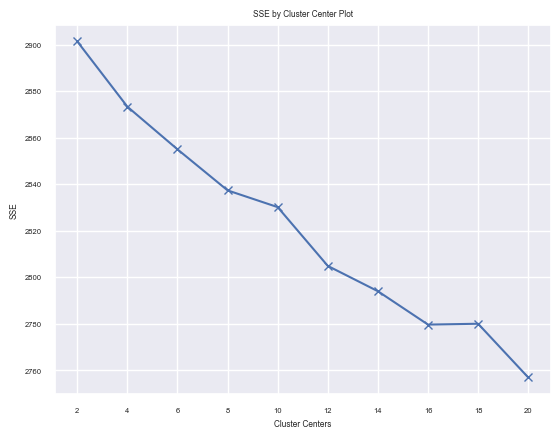

In [310]:
# Clustering Documents with TFIDF and KMeans #
# Karin 17/Oct #

# Create function, Finding Optimal Cluster
# Clustering using Mini-Batch K-Means
def Optimal_Clusters (data, max_k):
    iterate = range(2, max_k + 1, 2)

    SSE = []
    for k in iterate:
        SSE.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)

    # plotting graph #
    f, ax = plt.subplots(1, 1)
    ax.plot(iterate, SSE, marker = 'x')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iterate)
    ax.set_xticklabels(iterate)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

Optimal_Clusters(Z, 20)

In [311]:
# Plot PCA and TSNE graph.
# Clustering using Mini-Batch K-Means
clusters = MiniBatchKMeans(n_clusters = 14, init_size = 1024, batch_size = 2048, random_state = 20).fit_predict(Z)

/Users/karin/opt/miniconda3/envs/dataMining/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/Users/karin/opt/miniconda3/envs/dataMining/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/Users/karin/opt/miniconda3/envs/dataMining/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/karin/opt/miniconda3/envs/dataMining/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning:

The defau

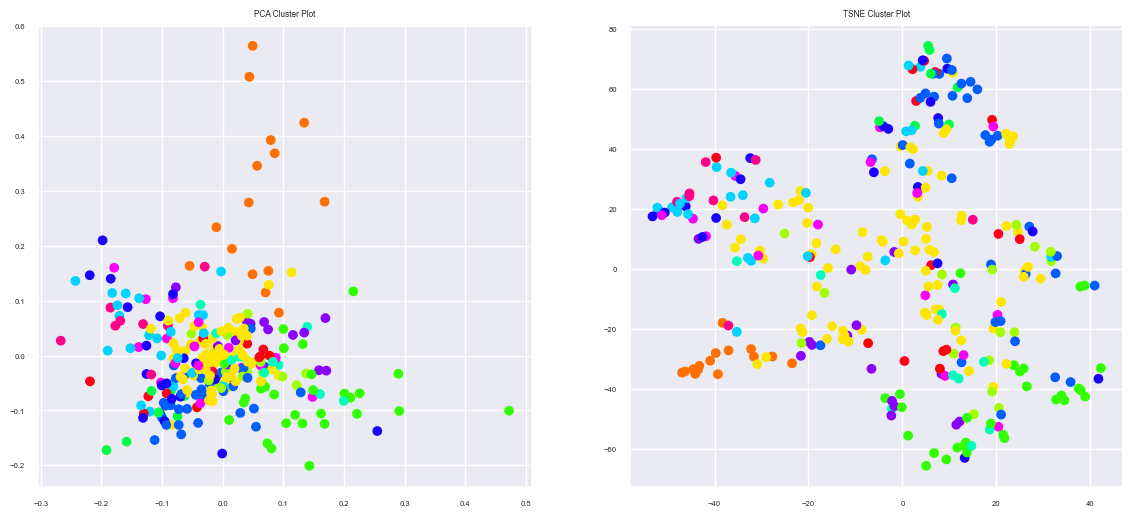

In [312]:
# Create function for plotting TSNE and PCA plotting.
def plot_tsne_pca(data, labels):
    max_labels = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size = 2000, replace = False)

    pca = PCA(n_components = 2).fit_transform(data[max_items, :].todense())
    tsne = TSNE().fit_transform(PCA(n_components = 2).fit_transform(data[max_items, :].todense()))

    idx = np.random.choice(range(pca.shape[0]), size = 300, replace = False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_labels) for i in label_subset[idx]]

    f, ax = plt.subplots(1, 2, figsize = (14,6))    # This will create 2 plot with size (14,6)

    # PCA Plotting
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c = label_subset)
    ax[0].set_title('PCA Cluster Plot')

    # TSNE Plotting
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c = label_subset)
    ax[1].set_title('TSNE Cluster Plot')

plot_tsne_pca(Z, clusters)

---

# 4th Assignment
Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__

The things that are not ideal or the most efficient/meaningful that I found.
1. In Word-Frequency or TFIDF, We have not remove __stop words__ from the sentence which will not inefficient in real world case.
Because stop word is not show significant meaning to the text that we want to analyze.
Also, normally text will mostly have this kind of stop words so we will not see the real insight of data that we have to analyze.
2. In Word-Frequency or TFIDF, No lemmatisation step. The lemmatisation step will switches any kind of word it its base root mode which mean that
if we don't analyze the data clearly.
3. On `5.5 Attribute Transformation / Aggregation` topics that we try plotting `sns.barplot` using `seaborn` library. In my opinion with this plot might not show any meaning. To create it more meaningful, I think we have to `sort` the terms on the `x-axis` by frequency as in __Exercise 15 (take home)__ so the data will more meaningful and we will be able to observe `long tail`.
4. When we try to convert from sparse array to normal array -> X_counts[0:5, 0:100].toarray()
The result show the huge sparse matrix, which is computationally to generate and difficult to visualize, instead of convert sparse array to normal array,
I think we can compress sparse array using `from scipy.sparse import csc_matrix` so it will show only non-zero term. It will easily visualize for seeing only non-zero term and we can check `count_vect.get_feature_names_out()` easily. This way is more efficient way compare to the method that show in the Lab.
5. On `5.4 Dimensionality Reduction` instead of plotting using `matplotlib.pyplot` I think If we're plotting using `plotly.express` it will be more effective than using `matplotlib.pyplot` because with `plotly.express` we can interact the graph and check information inside.
6. If we want to know how sparse of the data by visualization another way to plot the graph is using `plt.spy()`.

---